In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Cargar el dataset
file_path = 'Mall_Customers.csv'  # Cambiar a la ruta de tu archivo
data = pd.read_csv(file_path)

In [55]:
#ANALISIS EXPLORATORIO DE DATOS

In [56]:
# Mostrar información básica del dataset
print("Información del Dataset:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(data.describe())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Estadísticas Descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000     

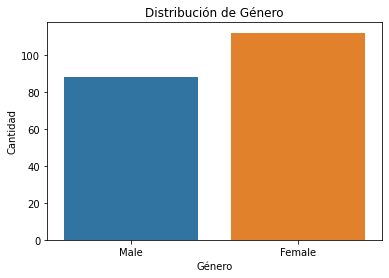

In [57]:
# Visualización de la distribución de género
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

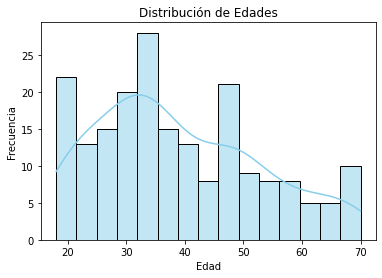

In [58]:
# Visualización de la distribución de edades
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

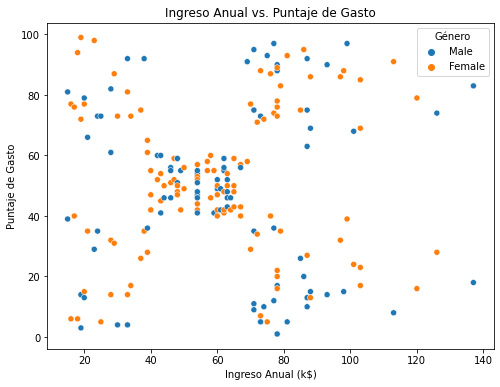

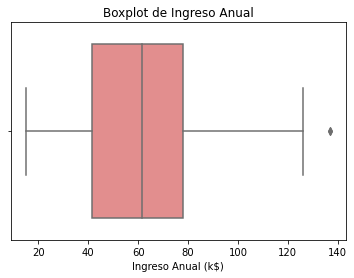

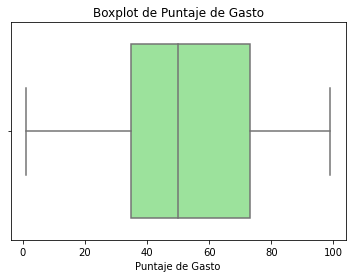

In [59]:
# Relación entre Ingreso Anual y Puntaje de Gasto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Ingreso Anual vs. Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto')
plt.legend(title='Género')
plt.show()

# Boxplot para identificar valores atípicos en Ingreso Anual
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Annual Income (k$)'], color='lightcoral')
plt.title('Boxplot de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.show()

# Boxplot para identificar valores atípicos en Puntaje de Gasto
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Spending Score (1-100)'], color='lightgreen')
plt.title('Boxplot de Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto')

plt.show()

In [60]:
#PREPROCESAMIENTO DE DATOS

In [61]:
# 1. Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# 2. Eliminar columnas no relevantes
# 'CustomerID' no es útil para el clustering, se elimina
data_cleaned = data.drop(columns=['CustomerID'])

# 3. Codificar variables categóricas
# Convertir la variable 'Gender' en valores numéricos (0: Male, 1: Female)
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 0, 'Female': 1})

# 4. Estandarizar los datos
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
scaled_data = scaler.fit_transform(data_cleaned)

# Crear un DataFrame con los datos estandarizados
data_scaled = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Mostrar el dataset preprocesado
print("\nDataset preprocesado y estandarizado:")
print(data_scaled.head())

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset preprocesado y estandarizado:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980


In [62]:
#SELECCION DE CARACTERISTICAS 

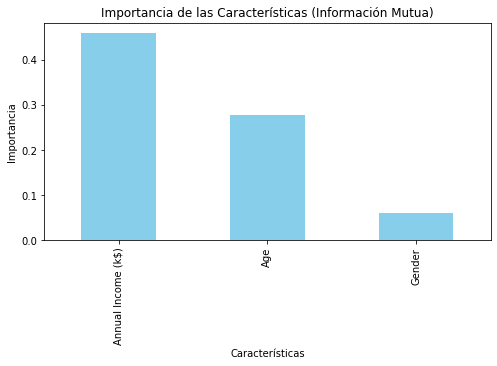

Características seleccionadas: ['Annual Income (k$)', 'Age', 'Gender']


In [63]:
# X son las características y y es la variable objetivo
X = data_scaled.drop(columns=['Spending Score (1-100)'])  # Características
y = data_scaled['Spending Score (1-100)']  # Variable objetivo

# Calcular información mutua
mutual_info = mutual_info_regression(X, y, random_state=42)
mutual_info = pd.Series(mutual_info, index=X.columns)

# Ordenar características por importancia
mutual_info = mutual_info.sort_values(ascending=False)

# Visualización de la importancia de las características
plt.figure(figsize=(8, 4))
mutual_info.plot(kind='bar', color='skyblue')
plt.title('Importancia de las Características (Información Mutua)')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.show()

# Seleccionar características con información mutua mayor a 0
selected_features = mutual_info[mutual_info > 0].index.tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas:", selected_features)


In [64]:
##K-MEANS

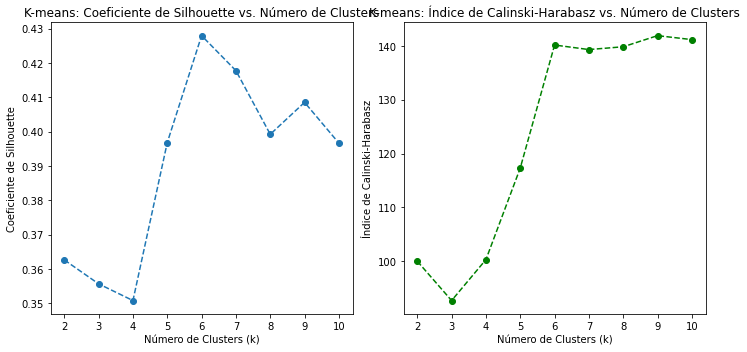

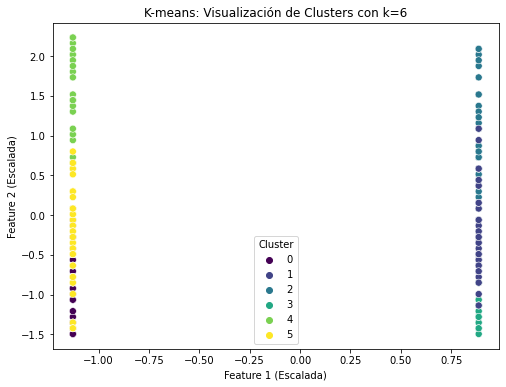

In [65]:
# Evaluar K-means con diferentes métricas
silhouette_scores_kmeans = []
calinski_scores_kmeans = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    silhouette = silhouette_score(X, clusters)
    calinski = calinski_harabasz_score(X, clusters)
    
    silhouette_scores_kmeans.append(silhouette)
    calinski_scores_kmeans.append(calinski)

# Visualización de métricas para K-means
plt.figure(figsize=(10, 5))

# Coeficiente de Silhouette para K-means
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_kmeans, marker='o', linestyle='--')
plt.title('K-means: Coeficiente de Silhouette vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')

# Índice de Calinski-Harabasz para K-means
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_scores_kmeans, marker='o', linestyle='--', color='green')
plt.title('K-means: Índice de Calinski-Harabasz vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Calinski-Harabasz')

plt.tight_layout()
plt.show()

# Entrenamiento final con K-means
optimal_k_kmeans = k_values[np.argmax(silhouette_scores_kmeans)]
final_kmeans = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
final_clusters_kmeans = final_kmeans.fit_predict(X)

# Visualización de clusters de K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X.iloc[:, 0], y=X.iloc[:, 1], hue=final_clusters_kmeans, palette='viridis', s=50
)
plt.title(f'K-means: Visualización de Clusters con k={optimal_k_kmeans}')
plt.xlabel('Feature 1 (Escalada)')
plt.ylabel('Feature 2 (Escalada)')
plt.legend(title='Cluster')
plt.show()

In [66]:
#CLUSTERING JERÁRQUICO

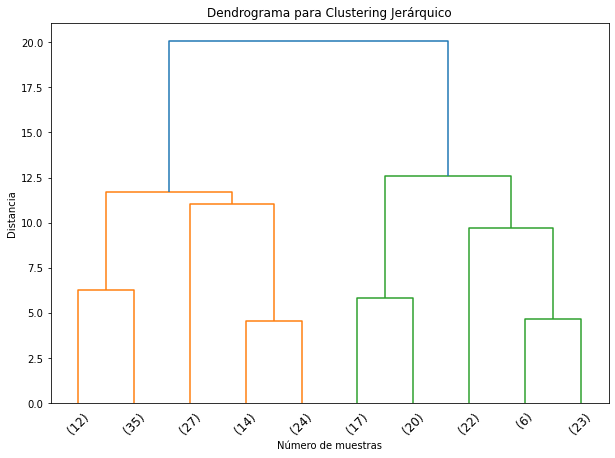

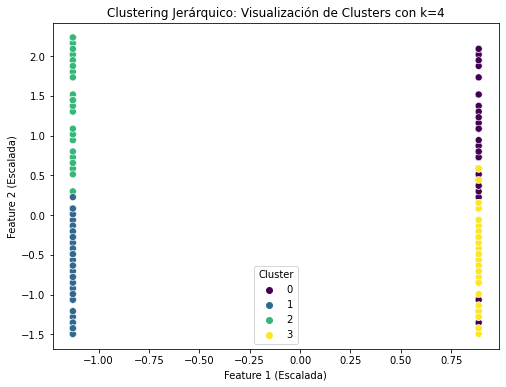

Clustering Jerárquico - Coeficiente de Silhouette: 0.33394691798186604
Clustering Jerárquico - Índice de Calinski-Harabasz: 91.03445521321194


In [67]:
# Crear un dendrograma para visualizar la estructura de clusters
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=12)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Número de muestras')
plt.ylabel('Distancia')
plt.show()

# Determinación visual del número óptimo de clusters
optimal_k_hierarchical = 4  # Se determina visualmente

# Clustering jerárquico con el número óptimo de clusters
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=optimal_k_hierarchical, affinity='euclidean', linkage='ward'
)
final_clusters_hierarchical = hierarchical_clustering.fit_predict(X)

# Visualización de clusters jerárquicos
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X.iloc[:, 0], y=X.iloc[:, 1], hue=final_clusters_hierarchical, palette='viridis', s=50
)
plt.title(f'Clustering Jerárquico: Visualización de Clusters con k={optimal_k_hierarchical}')
plt.xlabel('Feature 1 (Escalada)')
plt.ylabel('Feature 2 (Escalada)')
plt.legend(title='Cluster')
plt.show()

# Métricas de evaluación para el modelo jerárquico
silhouette_hierarchical = silhouette_score(X, final_clusters_hierarchical)
calinski_hierarchical = calinski_harabasz_score(X, final_clusters_hierarchical)

print(f"Clustering Jerárquico - Coeficiente de Silhouette: {silhouette_hierarchical}")
print(f"Clustering Jerárquico - Índice de Calinski-Harabasz: {calinski_hierarchical}")
